In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('../Script/results_evaluation_species.csv', sep='\t')
df



,Classifier,tp,fp,fn,ok,no,(tp+fp+fn+ok+no),sens,prec,f1,pearson
0,strex_centrifuge_250000.res,2174170,233414,345022,372394,0,3125000,0.695734,0.903051,0.785951,0.897337
1,strex_centrifuge_25000_SP.res,2228197,247907,275167,373729,0,3125000,0.713023,0.899880,0.795628,0.901331
2,strex_centrifuge_25000_SPZ.res,2326059,408649,14858,375434,0,3125000,0.744339,0.850569,0.793916,0.914041
3,strex_centrifuge_25000_ST.res,1038988,163607,1561735,360670,0,3125000,0.332476,0.863955,0.480169,0.797244
4,strex_centrifuge_25000_STZ.res,1247136,1499666,14858,363340,0,3125000,0.399084,0.454032,0.424788,0.815338
5,strex_clark_genus_250000.res,0,9530,486494,2628976,0,3125000,0.000000,0.000000,0.000000,NaN
6,strex_clark_genus_25000_SP.res,0,16218,380243,2728539,0,3125000,0.000000,0.000000,0.000000,NaN
7,strex_clark_genus_25000_SPZ.res,0,188309,26416,2910275,0,3125000,0.000000,0.000000,0.000000,NaN
8,strex_clark_genus_25000_ST.res,0,43779,1637397,1443824,0,3125000,0.000000,0.000000,0.000000,NaN
9,strex_clark_genus_25000_STZ.res,0,1366873,26416,1731711,0,3125000,0.000000,0.000000,0.000000,NaN


fn = false negatives

tp = true positives

tn = true negatives

Recall  = tp/all

Precision = (all-fp) / all

Ste tabelle si fanno assolutamente su Latex.



| Dataset | Tool | Species    | ||   | Genus   | |||
|---:|:--|:-----|:------|:------|:------|:------|:------|:------|:------|
|   | | **Precision**    |**Recall** | **F-m**||  **Precision**  | **Recall**   | **f-m**|
|**all_250000**| centrifuge      | 0.695734     |0.903051    |0.boh|   |  0.988  | 0.629   | 0.762|
|              | centrifuge_SP   | 0.713023     |0.899880    |0.boh|   |  0.988  | 0.629   | 0.762|
|              |**Diff**         | 0.17289      |-0.3171     |0.boh|   |  0.988  | 0.629   | 0.762| 
|              | kraken1         | 0.687426     |0.903602    |0.boh|   |  0.988  | 0.629   | 0.762|
|              | kraken1_SP      | 0.700920     |0.899193    |0.boh|   |  0.988  | 0.629   | 0.762|
|              |**Diff**         | 0.13494      |-0.4409     |0.boh|   |  0.988  | 0.629   | 0.762| 



In [6]:
def ClassifiersPlt(name):
    new_df = df[df["Classifier"].str.contains(name)]    

    x = new_df['Classifier']
    y1 = new_df['sens'] * 100
    y2 = new_df['prec'] * 100

    plt.figure(figsize=(20,8))

    #label
    plt.plot(x, y1, color='darkgreen', marker='o', linestyle='dashed',linewidth=2, markersize=15, label='Recall')

    plt.plot(x, y2, color='orange', marker='^', linestyle='dashed',linewidth=2, markersize=15, label='Precision')

    plt.ylim(0,101)
    plt.yticks(np.arange(0,101,5))
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.xlabel('Classificators',fontsize=14)
    plt.ylabel('Evaluation [%]',fontsize=14)
    
    plt.title(name,fontweight='bold',fontsize=20)

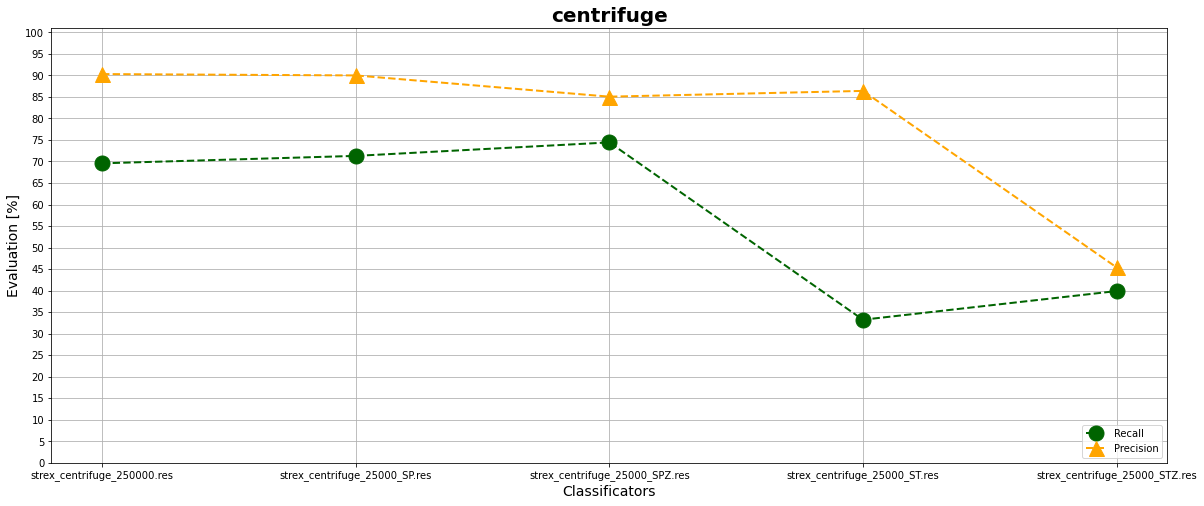

In [7]:
ClassifiersPlt('centrifuge')

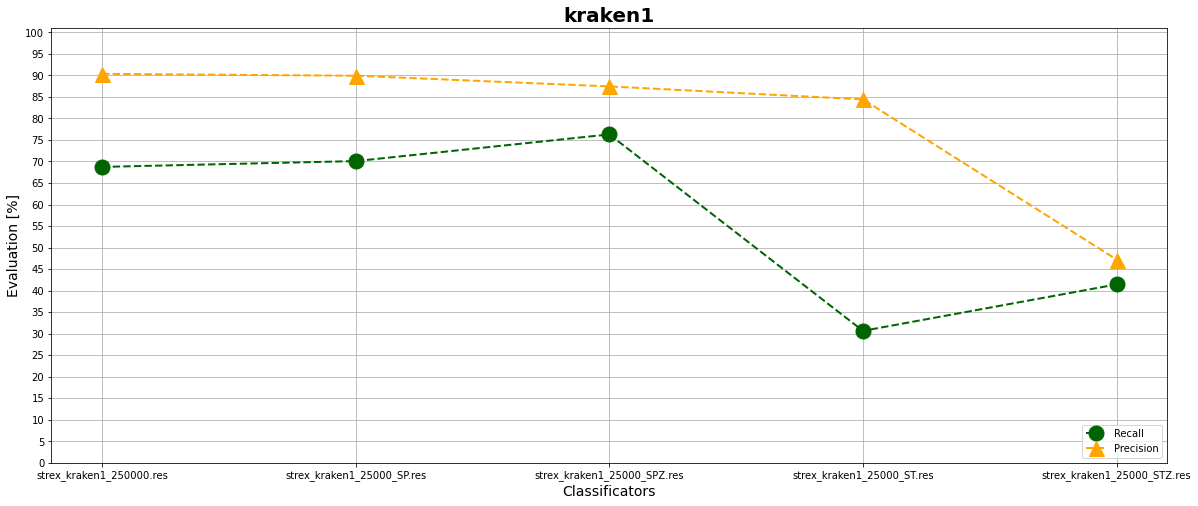

In [9]:
ClassifiersPlt('kraken1')

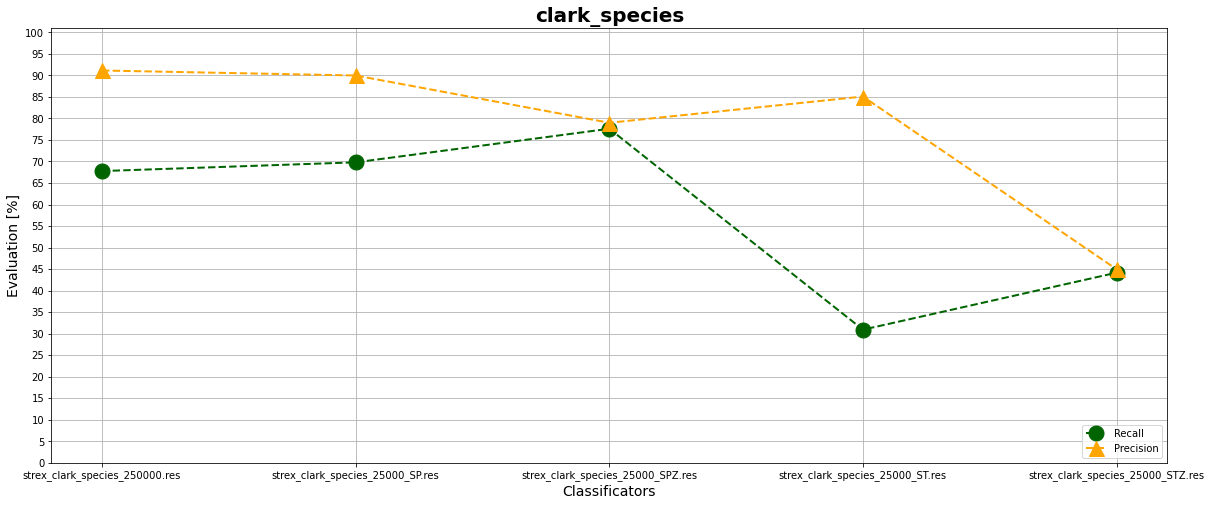

In [11]:
ClassifiersPlt('clark_species')